# P1: Convolutions, Fourier Transforms, and Image Pyramids

This is the first programming assignment you will be asked to complete in the course. As we are just starting off, I have tried to keep this assignment to a manageable size (especially since many of us are working remotely and on different schedules). In the future, I will give you assignments that are a bit more open-ended, and encourage you to try different options, discover which are more effective for different tasks, and explain the decisions you have made. Since this is the beginning of the class, this assignment is a bit more formulaic.

You are *required* to LaTeX your solutions to this assignment and use the 10pt, 2-column `ieeeconf` template. You can find the template [on Overleaf](https://www.overleaf.com/latex/templates/preparation-of-papers-for-ieee-sponsored-conferences-and-symposia/zfnqfzzzxghk); Overleaf is an online LaTeX editor with a free tier, so feel free to use that service to compose your writeups. It is perhaps the easiest option, particularly if you are not as familiar with LaTeX. The space limit for this assignment is **4 pages maximum**. While I don't expect this limit will pose a particular challenge for this assignment, in the future I hope that it will encourage you to think more carefully about what results you choose to include and to be more clear and succinct with your writing. You are allowed to work in small groups (2 or 3 students), but your solutions and your writeup should be your own.

With these homework assignments, I expect that your solutions will be written as if they are research papers: though the content is not "new", you should be trying to convince me through your writing that you have implemented and understand the algorithms. You should write in full sentences. When appropriate, comment on when the algorithms succeed or fail and where they are more or less effective; include numbers/metrics (quantitative) in addition to discussion (qualitative) whenever possible. If I ask you to compare two algorithms or approaches, you should be thorough in your comparison, using numbers in addition to qualitative explanations whenever possible. For example, at the end of P1.2.2, I ask you to compare different upsampling algorithms. Your response should include a discussion (in words) about how they are similar and different, but might also include a quantitative comparison: *by how much* do each of the upsampling algorithms differ from the original image? The [L2-norm](https://mathworld.wolfram.com/L2-Norm.html) might be meaningful to include.

Just like in a published paper, you should not include code snippets in your writeup unless it is explicitly asked for or you think it helps you explain your results or answer the question. **I will ask you to submit both the PDF of your writeup *and* a .zip file containing your code (which may be a modified form of this Jupyter notebook) on Blackboard**. Though it would be nice if your code were cleaned up and nicely formatted/commented, we will not likely execute your code unless we are skeptical for academic integrity reasons. We may also use your code to evaluate partial credit on multi-part assignments.

In [1]:
# Starter code (run this first)
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.signal
from PIL import Image

def load_image(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    return (np.asarray(img).astype(np.float)/255)[:, :, :3]

## P1.1 Getting Started With Filtering

In this first assignment, you will be writing functions to generate your own image filters and using them to process images. For this problem, **you are encouraged to use an image of your own choosing** (with a size of roughly 500px along either dimension), but you are also free to use the image I have provided.

**You do not need to implement the convolution yourself.** Your version will be slower than the version built in to `scipy.signal`, which you are welcome to use. I have provided you with some simple code to get you started:

/var/folders/tx/l6f736ts3dn69m0gp8r_ny_80000gp/T/ipykernel_16782/1130950202.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.asarray(img).astype(np.float)/255)[:, :, :3]


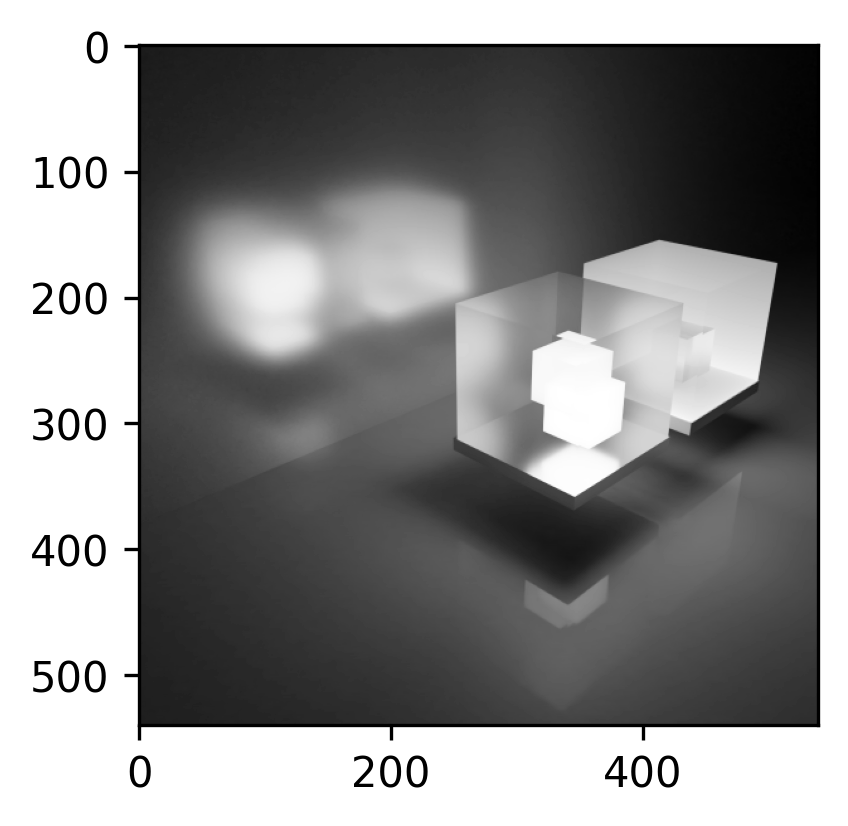

In [2]:
import scipy.signal

image = load_image("light_cubes_sm.png")[:, :, 0]
example_filter = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]
filtered_image = scipy.signal.convolve2d(
    image, example_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(filtered_image, cmap='gray')

None

### P1.1.1 Some Simple Filters

Apply the following filters to your image and plot them. For each, describe the effects the filter has on the image (and name it if you've seen it before). Which filters are *separable*? For the separable filters, write their components parts:

$$f_a = \frac{1}{9}\begin{bmatrix} 
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \end{bmatrix} $$
    
$$f_b = \frac{1}{3}\begin{bmatrix} 
    0 & 0 & 0 \\
    1 & 1 & 1 \\
    0 & 0 & 0 \end{bmatrix} $$

$$f_c = \frac{1}{6}\begin{bmatrix} 
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
    -1 & 0 & 1 
    \end{bmatrix} $$
    
$$f_d = \frac{1}{3}\begin{bmatrix} 
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 
    \end{bmatrix} $$

/var/folders/tx/l6f736ts3dn69m0gp8r_ny_80000gp/T/ipykernel_16782/1130950202.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.asarray(img).astype(np.float)/255)[:, :, :3]


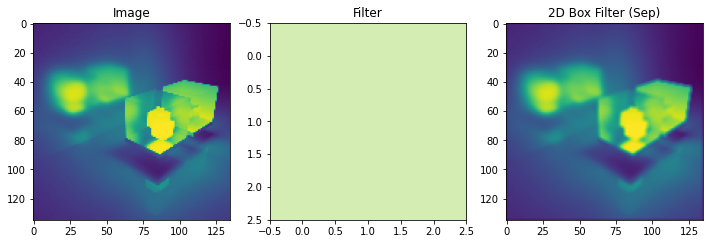

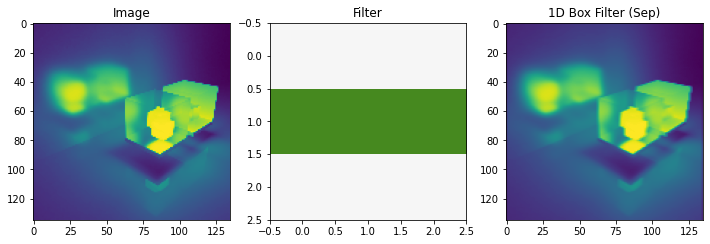

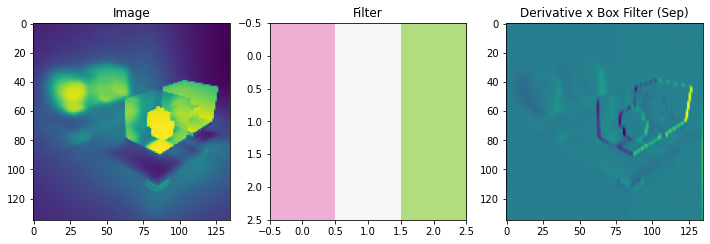

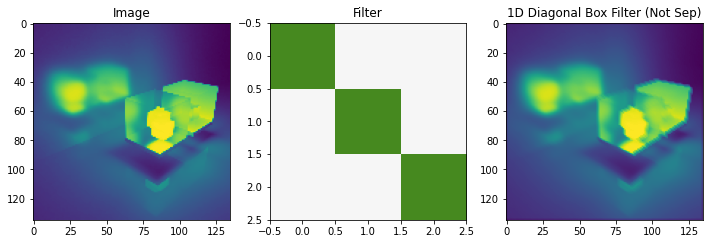

In [3]:
# Solution:
image = load_image("light_cubes_sm.png")[::4, ::4, 0]

def plot_before_after(image, filt, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.subplot(1, 3, 2)
    plt.imshow(filt, vmin=-0.4, vmax=0.4, cmap='PiYG')
    plt.title("Filter")
    plt.subplot(1, 3, 3)
    plt.imshow(scipy.signal.convolve(
            image, filt, mode='same'))
    plt.title(title)

fa = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])/9
plot_before_after(image, fa, '2D Box Filter (Sep)')

fb = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
])/3
plot_before_after(image, fb, '1D Box Filter (Sep)')

fc = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])/6
plot_before_after(image, fc, 'Derivative x Box Filter (Sep)')

fd = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])/3
plot_before_after(image, fd, '1D Diagonal Box Filter (Not Sep)')


### P1.1.2 Image Derivatives

Plot the following for the images you have chosen:
- The image derivatives $I_x$ and $I_y$, computed using the vertical and horizontal Sobel filters.
- Using $I_x$ and $I_y$, compute the image gradient magnitude and angle; include figures of both.
- Using a finite-difference method, derive a filter for the image Laplacian: $$\nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$$ Compute and plot the laplacian for your image (and include the definition of your Laplacian filter).

Be sure to title your plots so that it is clear which plot is which. 

*Note*: Be attentive with your color schemes for your plots. When plotting image derivatives, using a color map like `gray` or `viridis` assigns a middle value to a non-recognizable color somewhere in the middle of the spectrum. You might want to look into a *diverging color map* like `PiYG` and set the `vmin` and `vmax` args for `imshow` so that the zero-crossing is a *special value* of pure white. See the [matplotlib guide on colormaps](https://matplotlib.org/3.3.0/tutorials/colors/colormaps.html) for more details.

Text(0.5, 1.0, 'Gradient Angle')

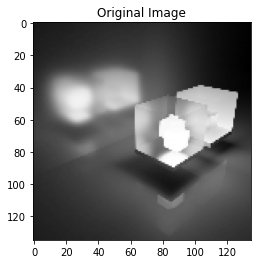

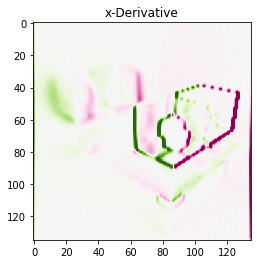

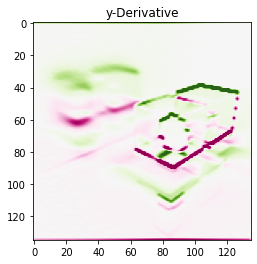

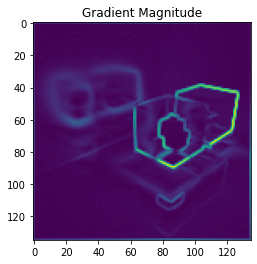

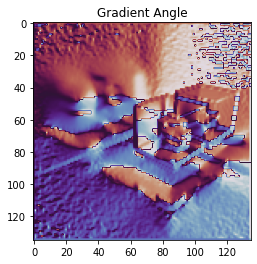

In [4]:
# Solution

laplacian_filter = [
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
]
laplacian_filter_alt = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]
sobel_x = np.array([
      [1, 0, -1],
      [2, 0, -2],
      [1, 0, -1]
])

sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

Ix = scipy.signal.convolve(
    image, sobel_x, mode='same')
Iy = scipy.signal.convolve(
    image, sobel_y, mode='same')
gradient_magnitude = np.sqrt(Iy**2 + Ix**2)
gradient_angle = np.arctan2(Iy, Ix)
laplacian_image = scipy.signal.convolve(
    image, laplacian_filter, mode='same')

plt.figure()
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.figure()
plt.imshow(Ix, cmap='PiYG', vmin=-1, vmax=1)
plt.title("x-Derivative")
plt.figure()
plt.imshow(Iy, cmap='PiYG', vmin=-1, vmax=1)
plt.title("y-Derivative")
plt.figure()
plt.imshow(gradient_magnitude, cmap='viridis')
plt.title("Gradient Magnitude")
plt.figure()
plt.imshow(gradient_angle, cmap='twilight')
plt.title("Gradient Angle")

### P1.1.3 Gaussian Filtering

Compute a discrete Gaussian Filter by completing the function `get_gaussian_filter` defined below. Compute filters of three different $\sigma$ values and apply them to your image (you should be able to see the difference in amount of blur between them). Plot the filters alongside the images they are used to generate. Be sure that the filter width is large enough that it does not meaningfully impact the output (a standard convention is to ensure that the filter width is at least $3\sigma$). What would happen if the filter width were too small compared to $\sigma$? You may answer in words, though a figure would also be acceptable.

**ANSWER**: If the filter width is too small, the filter will be truncated. In the extreme, this becomes a mean filter.

In class, we defined a `3x3` Gaussian filter as follows:
$$g = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}$$
What is the $\sigma$ of this filter?

**Answer** You can solve this by setting the general form of a Gaussian function $a \text{exp}((x^2 + y^2)/2\sigma^2)$ equal to the values of the filter at the center (where $x^2 + y^2 =0$) and at one of the edges (where $x^2 + y^2 = 1$). This yields values of $a = 1/16$ and $\sigma = 1/\sqrt{2 \ln(2)}$

/var/folders/tx/l6f736ts3dn69m0gp8r_ny_80000gp/T/ipykernel_16782/1130950202.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.asarray(img).astype(np.float)/255)[:, :, :3]


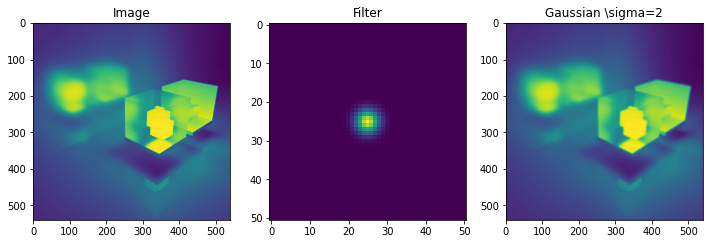

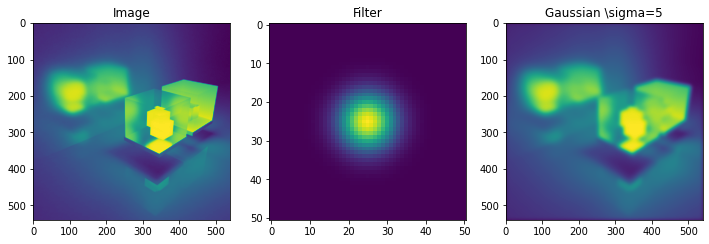

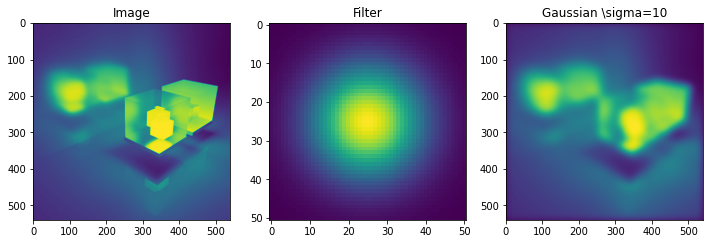

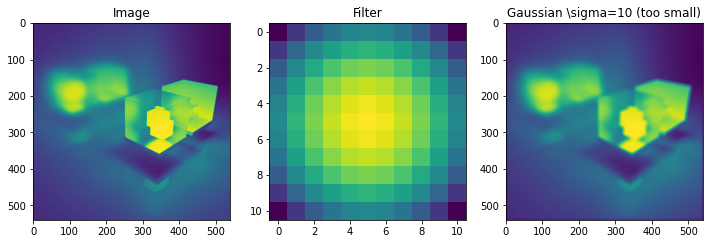

In [5]:
# Solution Code
import numpy as np

image = load_image("light_cubes_sm.png")[:, :, 0]

def plot_before_after(image, filt, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.subplot(1, 3, 2)
    plt.imshow(filt)
    plt.title("Filter")
    plt.subplot(1, 3, 3)
    plt.imshow(scipy.signal.convolve(
            image, filt, mode='same'))
    plt.title(title)


def get_gaussian_filter(n, sigma=1):
    assert(n % 2 == 1)
    h = (n + 1)//2
    d = np.arange(h)
    d = np.concatenate((d[::-1], d[1:]))
    d = d[:, np.newaxis]
    d_sq = d**2 + d.T ** 2
    # Take the gaussian
    g = np.exp(-d_sq/2/(sigma**2))
    # Normalize
    g = g/g.sum().sum()
    return g

gaussian_filter = get_gaussian_filter(51, 2)
plot_before_after(image, gaussian_filter, 'Gaussian \sigma=2')

gaussian_filter = get_gaussian_filter(51, 5)
plot_before_after(image, gaussian_filter, 'Gaussian \sigma=5')

gaussian_filter = get_gaussian_filter(51, 10)
plot_before_after(image, gaussian_filter, 'Gaussian \sigma=10')


gaussian_filter = get_gaussian_filter(11, 10)
plot_before_after(image, gaussian_filter, 'Gaussian \sigma=10 (too small)')

### P1.1.4 Derivative of Convolution

In class, we discussed the derivative of convolution theorem:

$$ \frac{\partial }{\partial x} (f * h) = \frac{\partial f}{\partial x} * h $$

Show empirically that this theorem holds on your image.

### P1.1.4S Derivative of Convolution

There are a few ways to show that this empirically holds: the analytical route, in which the derivative of the filter is computed analytically, and the numerical route, in which the derivative of the filters is computed using a numerical derivative. Here, I demonstrate both using the Gaussian and Laplace of Gaussian filters:

/var/folders/tx/l6f736ts3dn69m0gp8r_ny_80000gp/T/ipykernel_16782/1130950202.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.asarray(img).astype(np.float)/255)[:, :, :3]


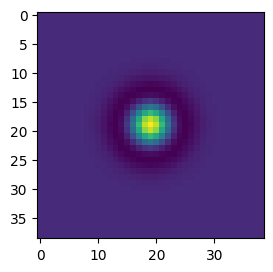

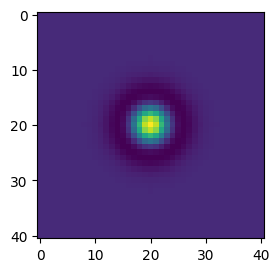

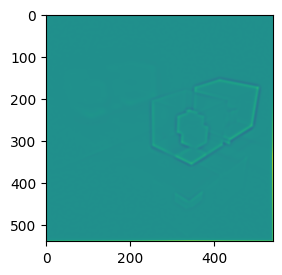

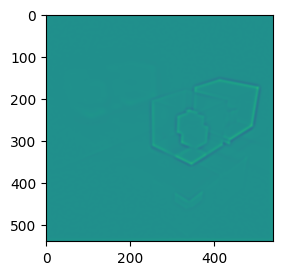

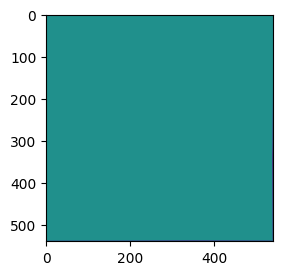

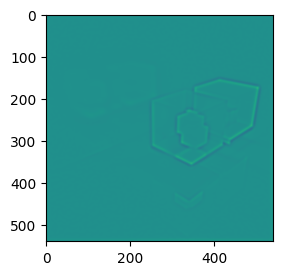

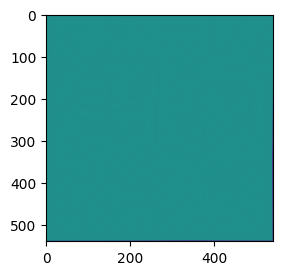

In [6]:
## Solution: I have shown this is true emperically in two
#  different ways: one using the analytic form of LoG and
#  in the other computing it numerically. In both, I show
#  that the two sides of the equation are equivalent

import scipy.signal

def get_LoG_filter(n, sigma=1):
    assert(n % 2 == 1)
    h = (n + 1)//2
    d = np.arange(h)
    d = np.concatenate((d[::-1], d[1:]))
    d = d[:, np.newaxis]
    d_sq = d**2 + d.T ** 2
    # Take the gaussian
    log = (1 - d_sq/2/(sigma**2)) * np.exp(-d_sq/2/(sigma**2)) / (sigma**4)
    return log/np.pi

image = load_image("light_cubes_sm.png")[:, :, 0]
laplacian_filter = [
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
]
gaussian_filter = get_gaussian_filter(41, 3)
log_filter = get_LoG_filter(41, 3)
log_filter_num = scipy.signal.convolve2d(
    gaussian_filter, laplacian_filter, mode='valid')

g_image = scipy.signal.convolve2d(
    image, gaussian_filter, mode='same')
log_image_left = scipy.signal.convolve2d(
    g_image, laplacian_filter, mode='same')
log_image_right = scipy.signal.convolve2d(
      image, log_filter_num, mode='same')
log_image_right_analytic = scipy.signal.convolve2d(
      image, log_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=100)
plt.imshow(log_filter_num)
plt.show()
fig = plt.figure(figsize=(3, 3), dpi=100)
plt.imshow(log_filter)
plt.show()

fig = plt.figure(figsize=(3, 3), dpi=100)
plt.imshow(log_image_left, vmin=-0.1, vmax=0.1)
fig = plt.figure(figsize=(3, 3), dpi=100)
plt.imshow(log_image_right, vmin=-0.1, vmax=0.1)
fig = plt.figure(figsize=(3, 3), dpi=100)
plt.imshow(log_image_right-log_image_left, vmin=-0.1, vmax=0.1)
fig = plt.figure(figsize=(3, 3), dpi=100)
plt.imshow(log_image_right_analytic, vmin=-0.1, vmax=0.1)
fig = plt.figure(figsize=(3, 3), dpi=100)
plt.imshow(log_image_right_analytic-log_image_left, vmin=-0.1, vmax=0.1)

## P1.2 Image Upsampling

In class, we discussed *Image Upsampling*, the process of making larger images from smaller ones by interpolating between the discrete pixel values. Upsampling (and the interpolation process) will become quite relevant in a few weeks when we discuss image warping.

### P1.2.1 Upsampling Kernels

In this part of the problem, you will be asked to upsample an image using some of the interpolation strategies we discussed in class. I have provided an image and its downsampled version.

Your task is to complete the `interp_STRATEGY` functions I have provided below. For each function, you are asked to provide the original image and the `new_x` and `new_y` values at which you would like the new value. I have provided you with the `upsample_image` function that will use the interpolation function you will create. Make sure you understand what is going on in that function. In particular, I have used the `np.ndenumerate` function to loop through the numpy arrays and the `image[y, x]` convention (since the image is stored as `[rows, columns]`).

I recommend that you begin by implementing an interpolation function that works on a 1-dimensional signal before attempting to upsample a 2-dimensional image. Feel free to include plots of the 1D interpolation if you feel it is helpful to your writeup.

Implement the three different interpolation strategies listed below: *nearest neighbor*, *bilinear*, and *bicubic* (See Ch 3.5 in Szeliski for a discussion of these strategies). Note that *bicubic* interpolation requires selecting a *boundary condition* for points outside the image; feel free to choose a "zero" boundary condition: i.e. return 0 whenever a point outside the image is requested. After interpolation, confirm that downsampling your upsampled image recovers your uninterpolated image for each upsampling function.

/var/folders/tx/l6f736ts3dn69m0gp8r_ny_80000gp/T/ipykernel_16782/1130950202.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.asarray(img).astype(np.float)/255)[:, :, :3]


<Figure size 432x288 with 0 Axes>

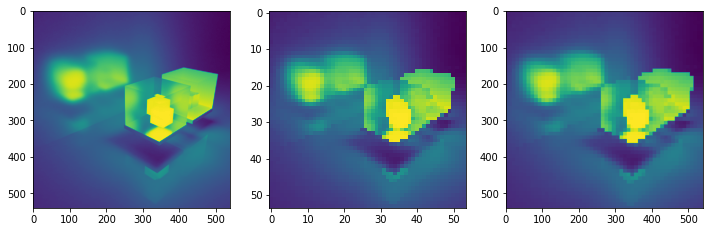

<Figure size 432x288 with 0 Axes>

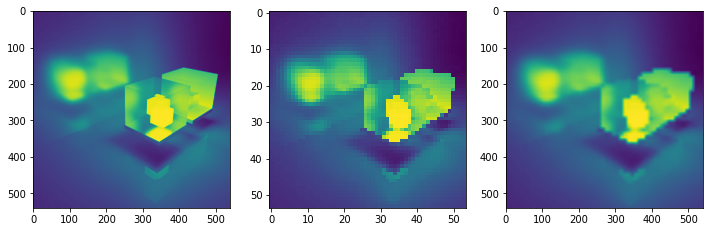

<Figure size 432x288 with 0 Axes>

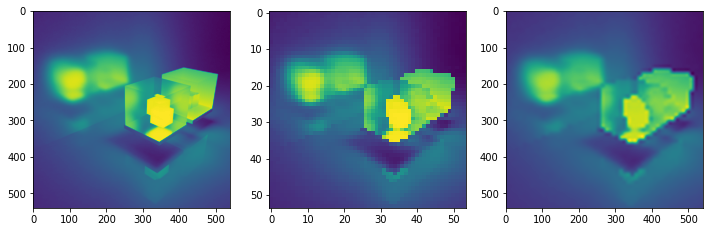

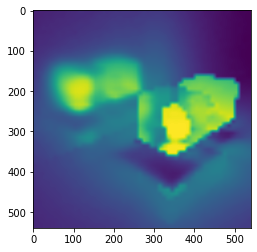

In [10]:
def upsample_image(image, target_shape, interp_fn):
    # Initialize the upsampled image
    image_up = np.zeros(target_shape)
    
    # Define the new coordinates (using the [y, x] convention
    # since image matrices are defined [row, column])
    new_xs = np.linspace(0, image.shape[1]-1, 
                         target_shape[1], endpoint=True)
    new_ys = np.linspace(0, image.shape[0]-1, 
                         target_shape[0], endpoint=True)
    
    # Loop through coordinates and set the image values
    for ix, new_x in np.ndenumerate(new_xs):
        for iy, new_y in np.ndenumerate(new_ys):
            image_up[iy, ix] = interp_fn(image, new_x, new_y)
            
    return image_up

def interp_nn(image, new_x, new_y):
    nx = int(round(new_x))
    ny = int(round(new_y))
    if nx < 0:
        nx = 0
    if ny < 0:
        ny = 0

    return image[ny, nx]
    
def interp_bilinear(image, new_x, new_y):
    def linear_interp_fn(d):
        return np.maximum(0, 1-np.abs(d))
    
    # Create a grid of the coordinates relevant from the initial image
    xs = np.arange(0, 2) + int(np.floor(new_x))
    ys = np.arange(0, 2) + int(np.floor(new_y))
    XS, YS = np.meshgrid(xs, ys)
        
    # Keep in bounds
    XS[XS<0] = 0
    XS[XS>image.shape[1]-1] = image.shape[1]-1
    YS[YS<0] = 0
    YS[YS>image.shape[0]-1] = image.shape[0]-1
    
    # Compute the weight matrix for the "importance" of those coordinates
    dxs = xs - new_x
    dys = ys - new_y
    weights = np.outer(linear_interp_fn(dys),
                       linear_interp_fn(dxs))
    
    # Compute the value via the dot product
    return np.sum(weights * image[YS, XS])
    
def interp_bicubic(image, new_x, new_y):
    def cubic_interp_fn(d, a=-0.5):
        out = np.array([0, 0, 0, 0], float)
        ad = np.abs(d)
        lc = (ad <= 1)
        lm = np.logical_and(1 < ad, ad < 2)
        out[lc] = (a+2)*ad[lc]**3 - (a+3)*ad[lc]**2 + 1
        out[lm] = a*ad[lm]**3 - 5*a*ad[lm]**2 + 8*a*ad[lm] - 4*a
        return out

    # Create a grid of the coordinates relevant from the initial image
    xs = np.arange(-1, 3) + int(np.floor(new_x))
    ys = np.arange(-1, 3) + int(np.floor(new_y))
    XS, YS = np.meshgrid(xs, ys)
    
    # Keep in bounds
    XS[XS<0] = 0
    XS[XS>image.shape[1]-1] = image.shape[1]-1
    YS[YS<0] = 0
    YS[YS>image.shape[0]-1] = image.shape[0]-1
    
    # Compute the weight matrix for the "importance" of those coordinates
    dxs = xs - new_x
    dys = ys - new_y
    weights = np.outer(cubic_interp_fn(dys),
                       cubic_interp_fn(dxs))
    
    # Compute the value via the dot product
    return np.sum(weights * image[YS, XS])

# Load data
image = load_image("light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]

# Nearest Neighbor
image = load_image("light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]
image_up_nn = upsample_image(image_sm, image.shape, interp_nn)
fig = plt.figure()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(image_sm)
plt.subplot(1, 3, 3)
plt.imshow(image_up_nn)

# Bilinear
image = load_image("light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]
image_up_bilinear = upsample_image(image_sm, image.shape, interp_bilinear)
fig = plt.figure()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(image_sm)
plt.subplot(1, 3, 3)
plt.imshow(image_up_bilinear)

# Bicubic
image_up_bicubic = upsample_image(image_sm, image.shape, interp_bicubic)
fig = plt.figure()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(image_sm)
plt.subplot(1, 3, 3)
plt.imshow(image_up_bicubic)

# Do the same thing with OpenCV
import cv2
plt.figure()
plt.imshow(cv2.resize(image_sm, image.shape, interpolation=cv2.INTER_LINEAR))

### P1.2.2 Upsampling and Fourier Transforms

One can also upsample images using a Fourier Transform using a technique known as *zero padding* ([here is a link](https://dsp.stackexchange.com/a/745) to a surprisingly succinct discussion of the rationale behind this approach from Stack Exchange). The idea behind zero padding is to (1) Fourier Transform your signal, (2) add zero-valued elements to the signal in frequency space (thereby making the vector or matrix larger and adding new frequency components that have zero amplitude) and (3) transforming back. In this question, I have provided you with some code to implement this upsampling procedure and ask that you answer a few emperical/conceptual questions about the process.

The first code block I have provided uses the numpy `np.fft.fft2` to compute a Fourier Transform of an image. One thing you will notice is that using the FFT implementation provided by numpy results in most of the "mass" in frequency space near the corner of the images. See the code below for an example; note that I have also included the $\log$ of the frequency space representation (and added a very small value to the frequency space image to account for values that may be zero), because it helps you get an idea of what is happening at the higher frequencies, which exist at the center of the image:

**PLOT:** Include the plot of the nearest neighbor upsampled image and its frequency-space representation in your writeup. 

**QUESTION:** (1-2 sentences) The NN upsampled image seems to have a grid-like structure. How do each of the grid cells seem to relate (visually) to the frequency-space representation of the small non-upsampled image?

**ANSWER:** You should notice that each "block" in the NN upsampled image is identical (up to a scale factor) to the frequency-space representation of the non-upsampled image.

**QUESTION:** (2-4 sentences) The "center" of each of the frequency-space correspond to the highest-frequency terms in the representation (components that oscilate quite quickly in image-space). Discuss the difference between the NN-upsampled and bilinear-upsampled frequency-space representation: which has more high-frequency components and how is this related to the "sharpness" of the edges in the different upsampling strategies?

**ANSWER:** The bilinear interpolation has far fewer high frequency components than the nearest neighbor version. As discussed in class, the high-frequency components are necessary for reproducing very sharp edges, such as those present in the NN upsampled image. The blinear image is smoother, and so most of the mass is concentrated at the lower frequencies.

Upsampling with Fourier Transforms: In the next code block, I have provided you with a function that upsamples an image using 'zero-padding' in frequency space. The function converts the image to frequency space, 'pads' the image with zeros (equivalent to adding new "high frequency" terms that have zero amplitude), and then converts the image back. Run the code below and look at the result:

/var/folders/tx/l6f736ts3dn69m0gp8r_ny_80000gp/T/ipykernel_16782/1130950202.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.asarray(img).astype(np.float)/255)[:, :, :3]


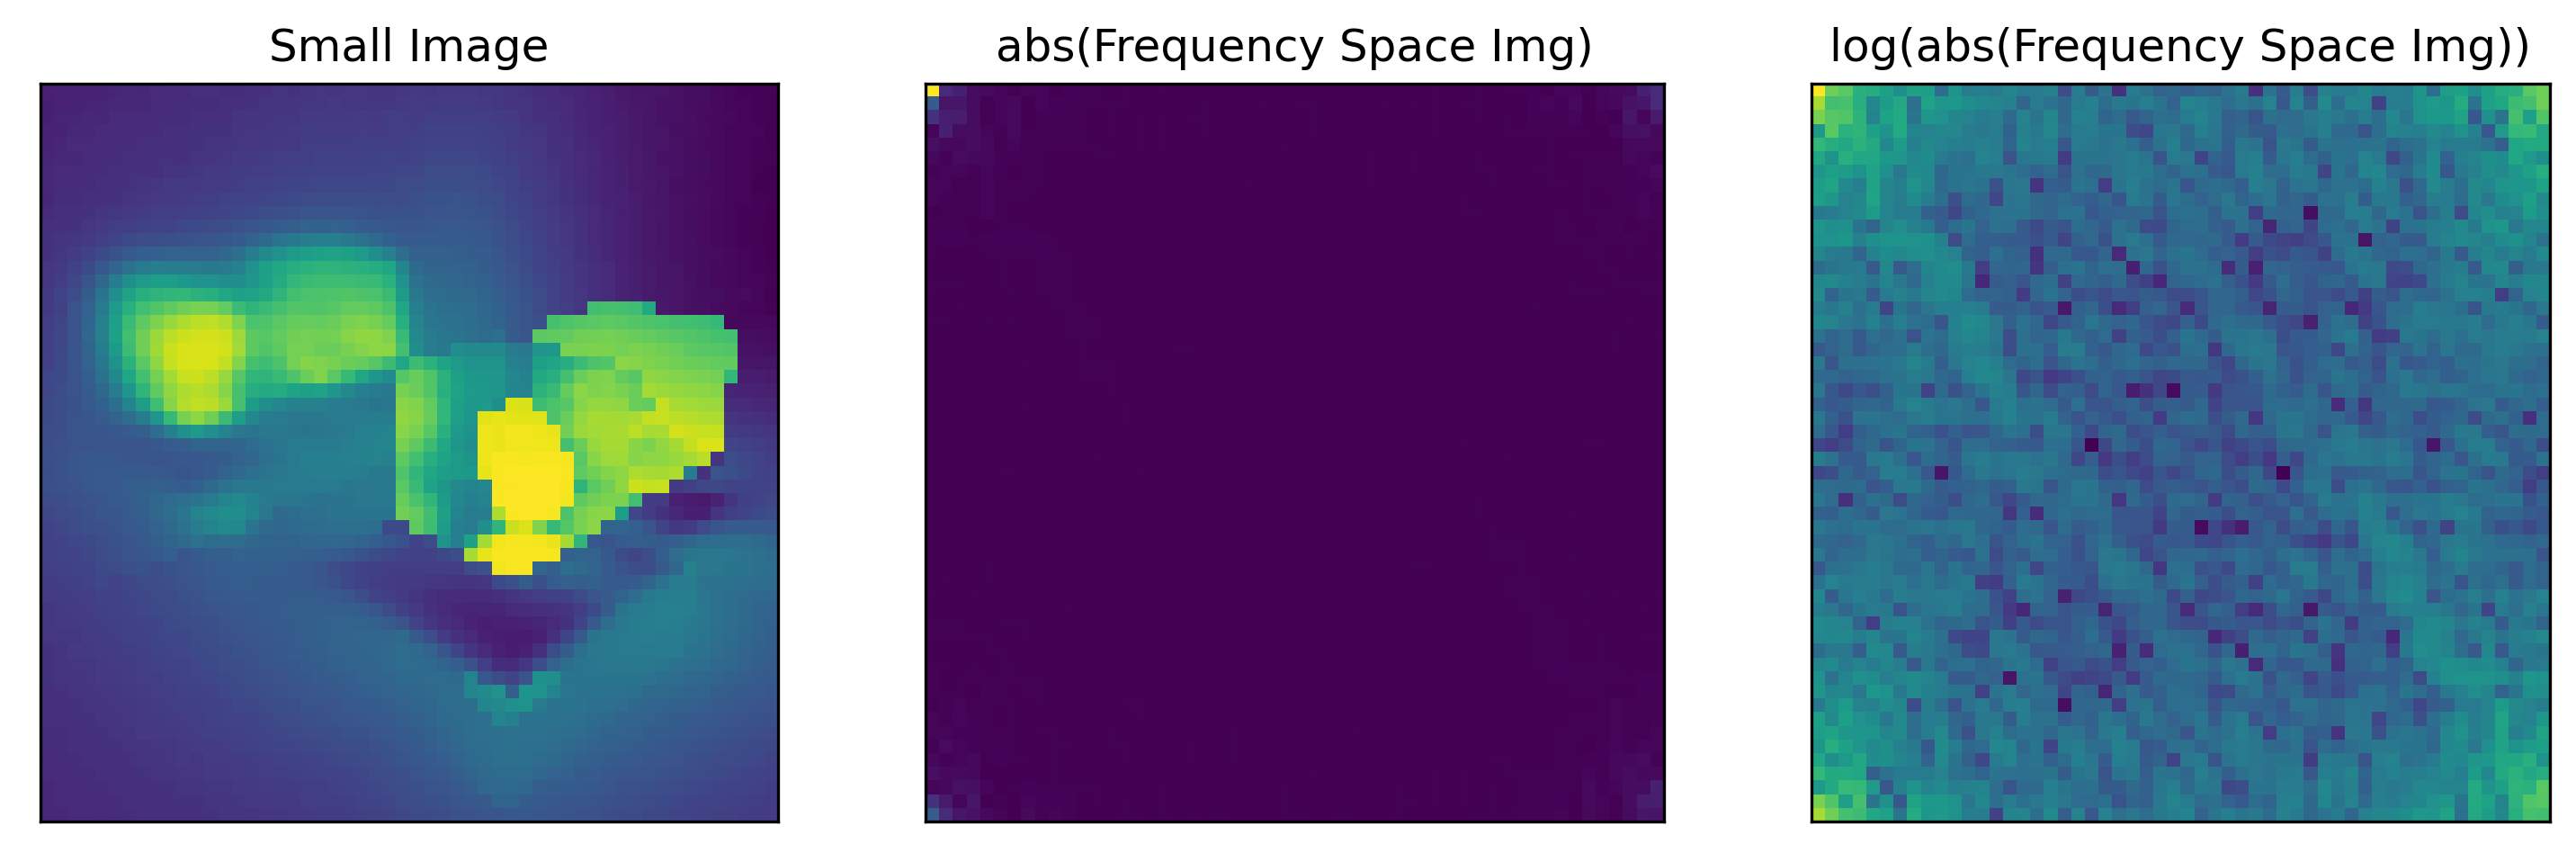

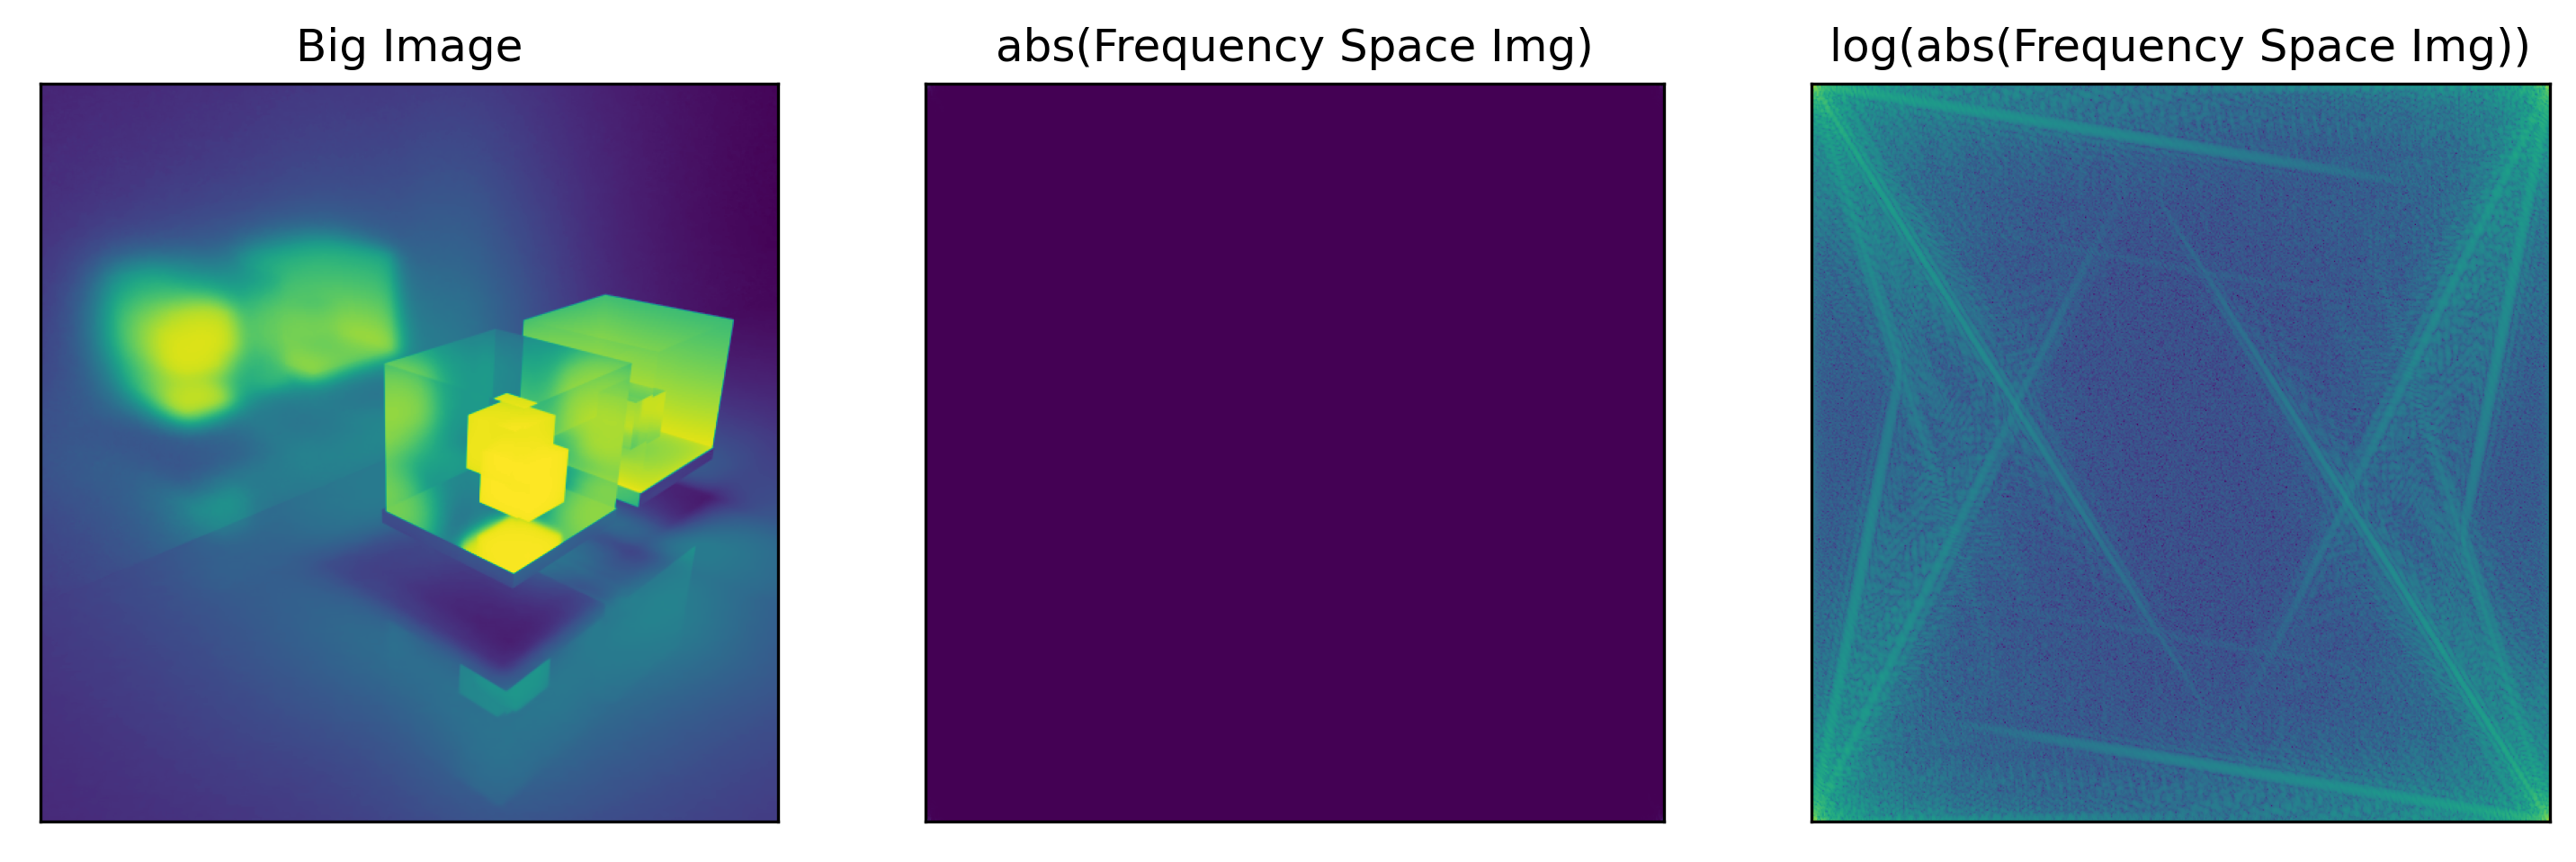

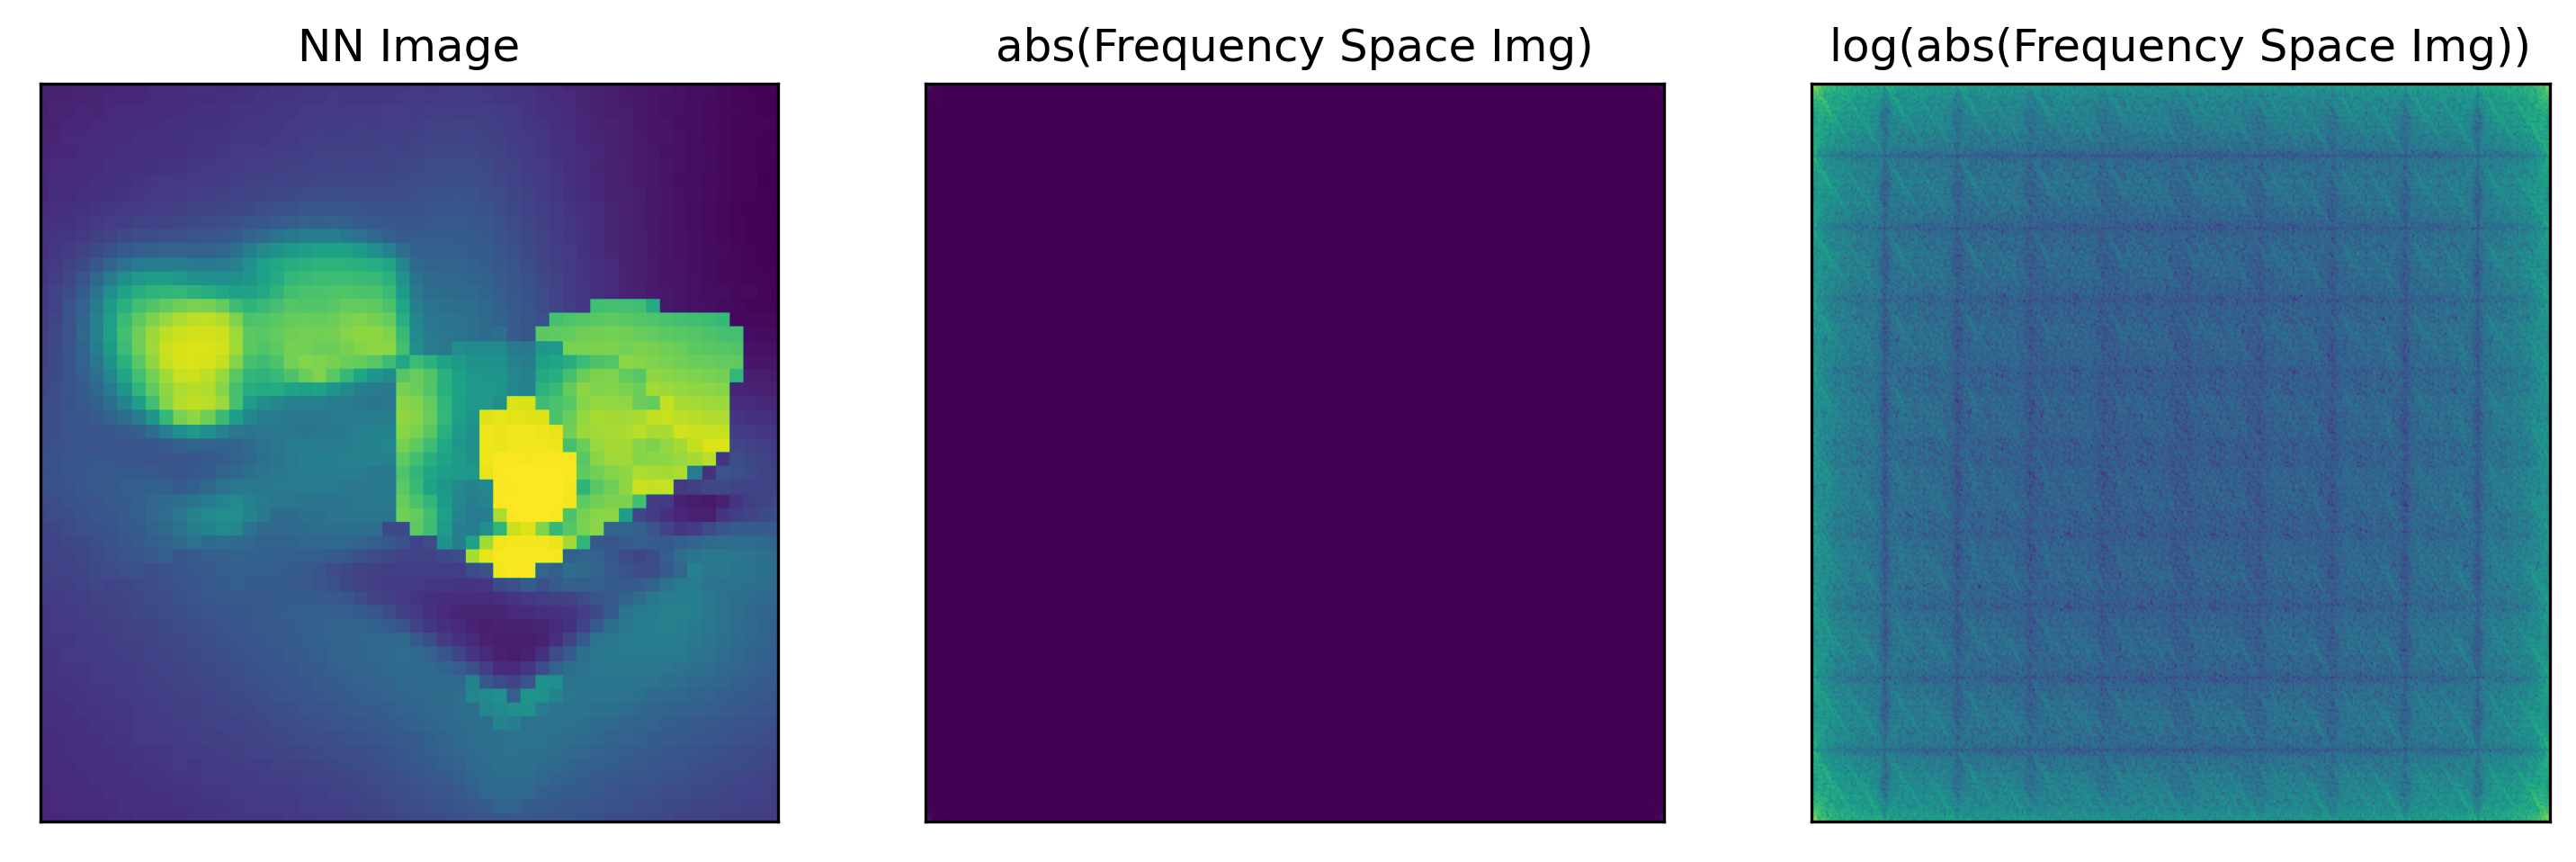

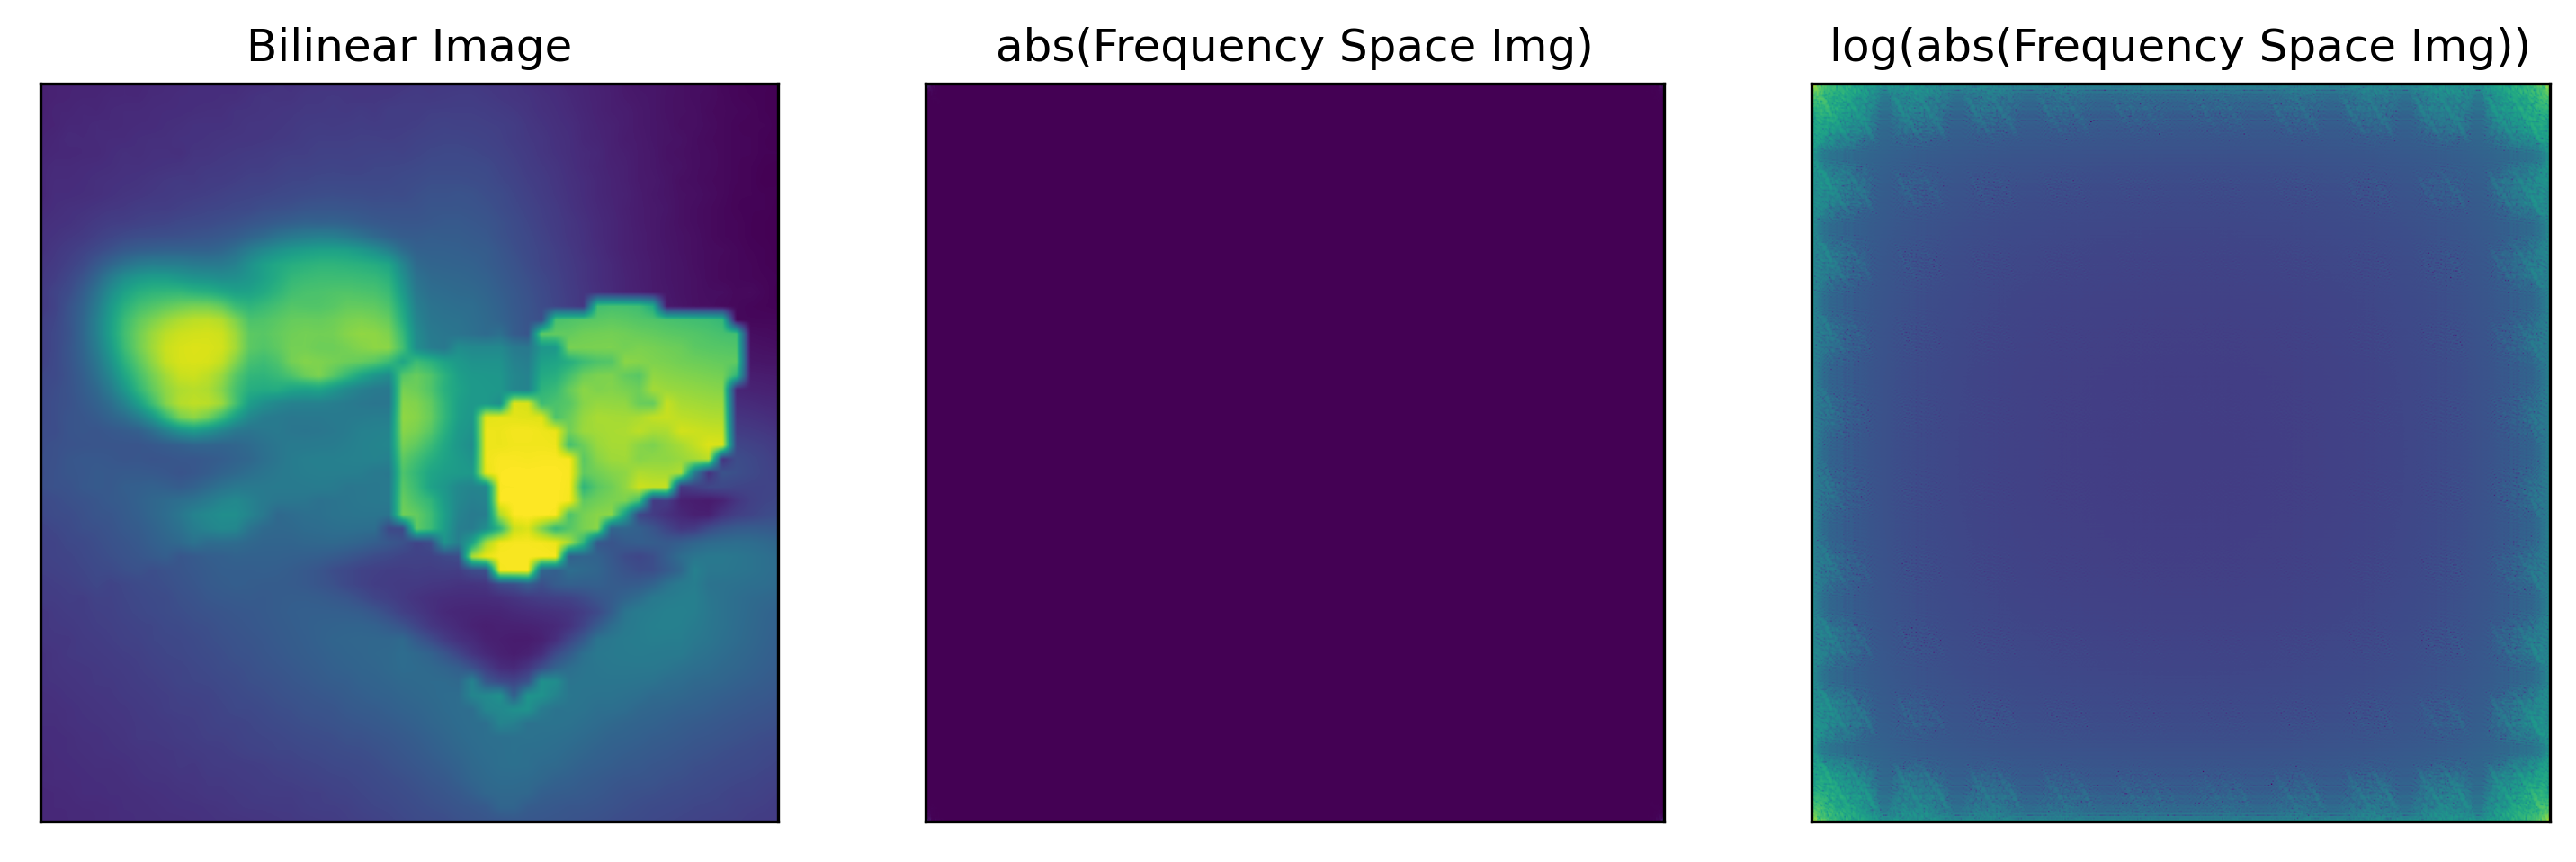

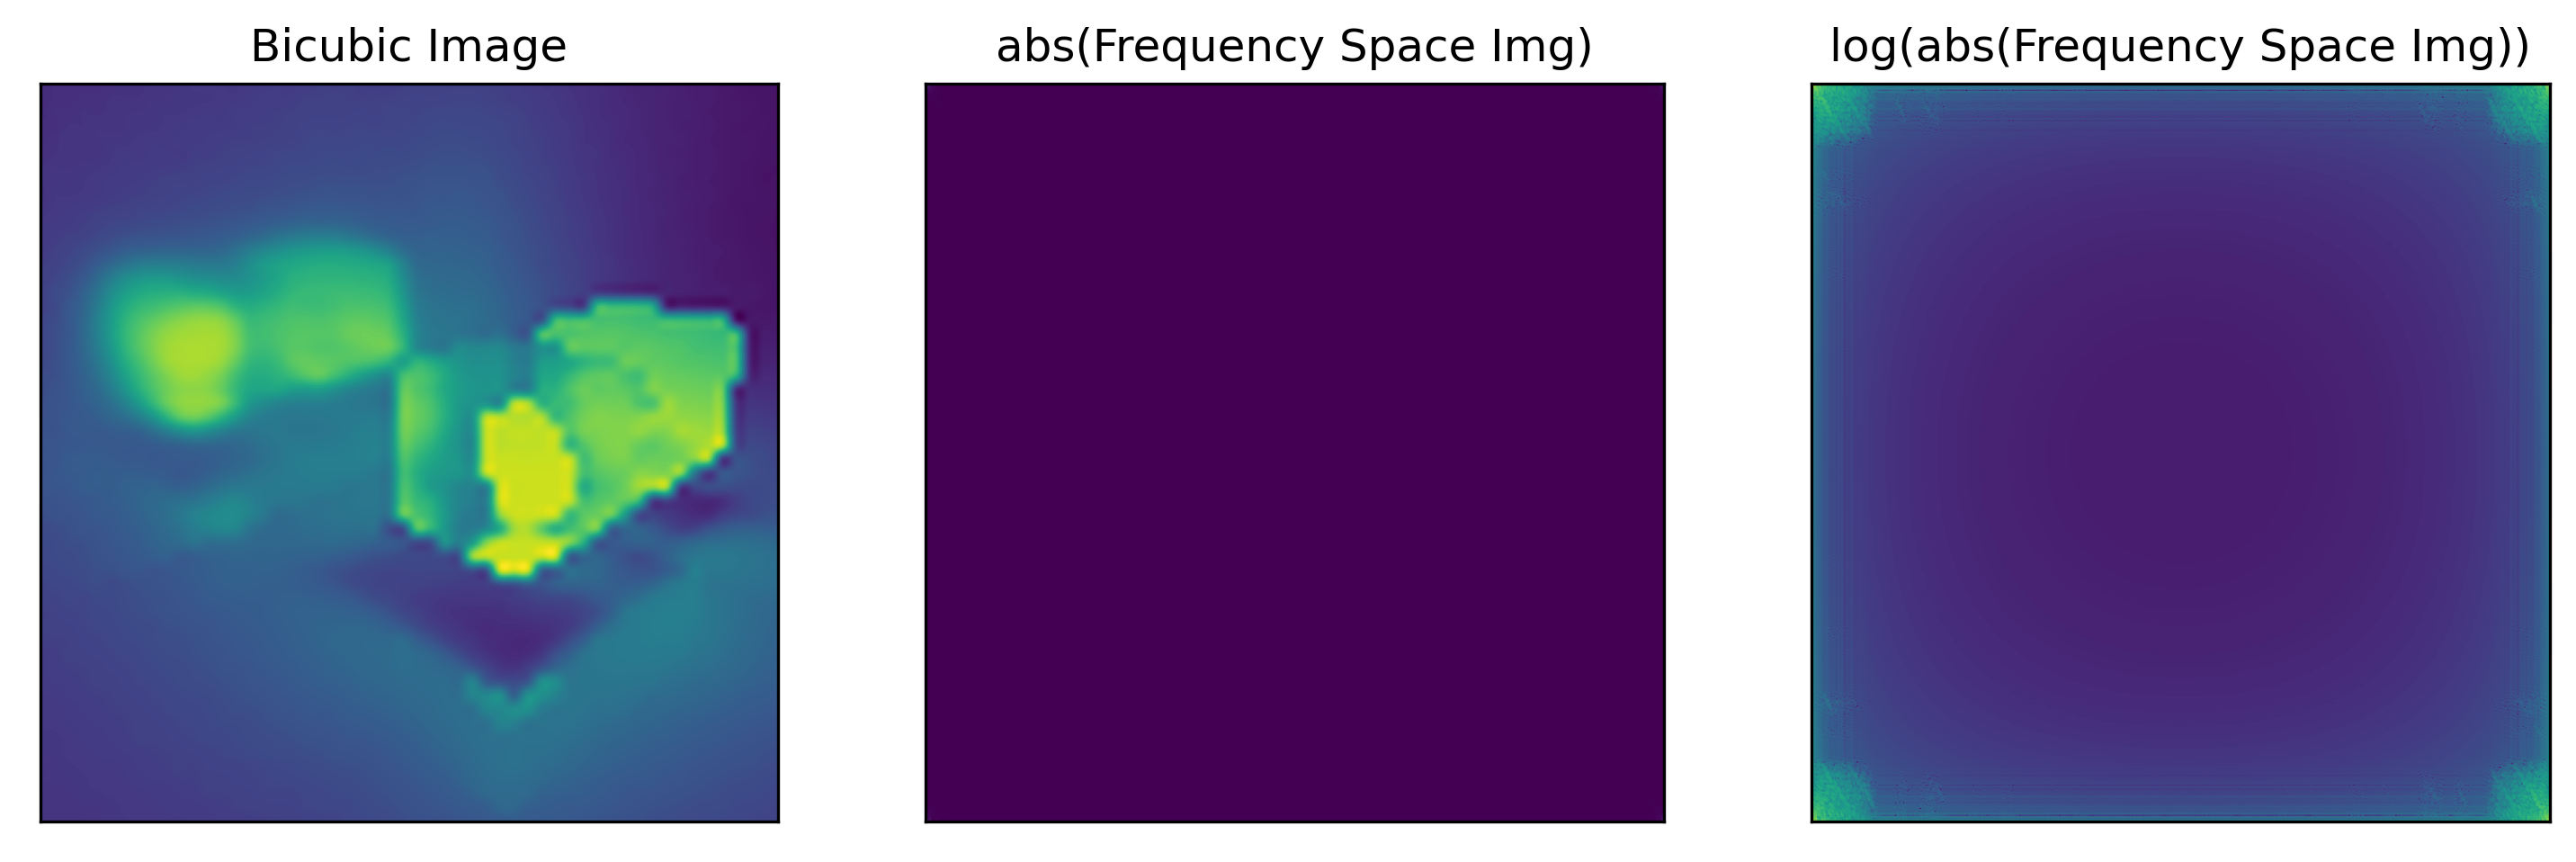

In [11]:
# Inspecting the Frequency Space Representation

image = load_image("light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]

def plot_freq_space_representation(img, title="Img"):
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = plt.subplot(1, 3, 1)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

    ax = plt.subplot(1, 3, 2)
    ax.imshow(np.abs(np.fft.fft2(img)))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('abs(Frequency Space Img)')

    ax = plt.subplot(1, 3, 3)
    ax.imshow(np.log(np.abs(np.fft.fft2(img)) + 1e-10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('log(abs(Frequency Space Img))')

    None
    
plot_freq_space_representation(image_sm, "Small Image")
plot_freq_space_representation(image, "Big Image")
plot_freq_space_representation(image_up_nn, "NN Image")
plot_freq_space_representation(image_up_bilinear, "Bilinear Image")
plot_freq_space_representation(image_up_bicubic, "Bicubic Image")

## P1.3 Hybrid Images (Contest)

In class, we discussed *hybrid images* in which the low-frequency components of one image are added to the high-frequency components of another and added together to make an image that looks like their different components up close and from far away. See the [Hybrid Images paper](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) for more details about the original research. 

Here, you are asked to implement a simplified version of the Hybrid Images work. We will vote as a class on the different submissions and pick out our favorites (though the vote will have no consequence on your grade).

Steps for completion:

1. Choose two images you intend to combine to form your *hybrid image*.
2. Implement a low-pass filter (using a Gaussian Blur: $g_{\sigma_1}$) and a high-pass filter (1 minus a Gaussian Blurred image: $1 - g_{\sigma_2}$). Apply the low-pass filter to one image and the high-pass filter to the other and average the two together. You may need to experiment with parameters $\sigma_1$ and $\sigma_2$.
3. **Generate a Gaussian image pyramid** from your newly constructed hybrid image. Combine all images into a single image as follows (without annotations): <img src="image_pyramid.png" alt="Image Pyramid" style="width: 400px;"/>

You do not need to implement the Laplacian image pyramid now, but you will likely need it again later on in the course, so it might be worth it to implement it now so that you have such a function when you need it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from PIL import Image

def load_image(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    return (np.asarray(img).astype(np.float)/255)[:, :, :3]

def compute_example_signal(length=256, step_width=64):
    step_center = length//2
    x = np.arange(length) - step_center
    signal = (np.abs(x) < step_width/2).astype(np.float)
    # Add noise to the signal
    signal += np.random.normal(scale=0.05, size=signal.shape)
    return signal

def nearest_neighbor_reduce(image):
    """Takes in a signal and returns a downsampled 
    version of that signal using nearest neighbor."""
    return image[::2, ::2]

image = load_image("lake_long_exposure_scene.png")[:, :, 0]

plt.figure(dpi=150, figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
image = nearest_neighbor_reduce(image)
plt.imshow(image)

plt.subplot(2, 2, 3)
image = nearest_neighbor_reduce(image)
plt.imshow(image)

plt.subplot(2, 2, 4)
image = nearest_neighbor_reduce(image)
plt.imshow(image)
plt.show()


## Now do the same thing with the Gaussian Pyramid kernel from class:
# Implement either of these functions
def gaussian_reduce(signal):
    # Initialize the output signal
    out_signal = np.zeros((signal.shape[0]+1)//2)
    # Loop through the elements of the output signal
    # and populate them with the values from the input
    for ii in range(out_signal.size):
        value = 0
        out_signal[ii] = value
        raise NotImplementedError("Define 'value'")
        
def gaussian_reduce(image):
    kernel = np.array([[0.1, 0.25, 0.3, 0.25, 0.1]])
    out_signal = scipy.signal.convolve2d(image, kernel, mode='same')
    out_signal = scipy.signal.convolve2d(out_signal, kernel.T, mode='same')
    return out_signal[::2, ::2]

plt.figure(dpi=150, figsize=(12, 12))
image = load_image("lake_long_exposure_scene.png")[:, :, 0]
plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
image = gaussian_reduce(image)
plt.imshow(image)

plt.subplot(2, 2, 3)
image = gaussian_reduce(image)
plt.imshow(image)

plt.subplot(2, 2, 4)
image = gaussian_reduce(image)
plt.imshow(image)
